# Summary

Use [`python-fitbit`](http://python-fitbit.readthedocs.io/en/latest/#) to interact with the Fitbit API and download activity data. Convert data to pandas dataframe and write to disk.

In [4]:
%load_ext pypath_magic

In [2]:
%pypath -a /Users/rbussman/Projects/sleep-bit

ERROR:root:Line magic function `%pypath` not found.


In [1]:
from src.data import get_fitbit
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('poster')

In [30]:
resources = [
    'activities/calories',  
    'activities/caloriesBMR',
    'activities/steps',
    'activities/distance',
    'activities/minutesSedentary',
    'activities/minutesLightlyActive',
    'activities/minutesFairlyActive',
    'activities/minutesVeryActive',
#     'activities/activityCalories'
]
df_activity = pd.DataFrame({})
for resource in resources:
    activity = resource.split('/')[1]
    resource_name = "-".join(resource.split('/'))
    activity_time_series = authd_client.time_series(resource, base_date='today', end_date='2016-11-09')
    df_activity[activity] = [resource_dict['value'] for resource_dict in activity_time_series[resource_name]]
df_activity['datetime'] = [resource_dict['dateTime'] for resource_dict in activity_time_series[resource_name]]

In [32]:
df_activity['datetime'] = pd.to_datetime(df_activity['datetime'])
df_activity = df_activity.set_index('datetime')

In [33]:
df_activity.head()

,calories,caloriesBMR,steps,distance,minutesSedentary,minutesLightlyActive,minutesFairlyActive,minutesVeryActive
datetime,,,,,,,,
2016-11-09,3200,1735,17760,8.47530422009856,712,301,29,68
2016-11-10,3733,1733,21888,10.47757346692784,449,322,98,106
2016-11-11,3094,1732,15847,7.69073609823168,572,284,66,51
2016-11-12,2994,1731,15215,7.26079694306304,620,273,61,31
2016-11-13,3009,1730,14414,6.91717867388704,616,307,32,49


In [34]:
data_path = os.path.join(os.getcwd(), os.pardir, 'data', 'interim', 'activity_data.csv')
df_activity.to_csv(data_path, index_label='datetime')

In [62]:
intraday = authd_client.intraday_time_series(
    'activities/steps', base_date='2017-08-03', detail_level='1min')

In [63]:
intraday.keys()

dict_keys(['activities-steps', 'activities-steps-intraday'])

In [77]:
intraday.keys()

dict_keys(['activities-steps', 'activities-steps-intraday'])

In [80]:
intraday['activities-steps-intraday'].keys()

dict_keys(['dataset', 'datasetInterval', 'datasetType'])

In [82]:
intraday['activities-steps-intraday']['datasetInterval']

1

In [83]:
import json

In [84]:
with open('test.json', 'w') as testfile:
    json.dump(intraday, testfile)

In [65]:
df_day = pd.DataFrame(intraday['activities-steps-intraday']['dataset'])

In [66]:
df_day['time'] = pd.to_datetime(df_day['time'])
df_day = df_day.set_index('time')

In [67]:
df15min = df_day.resample('10T').sum()

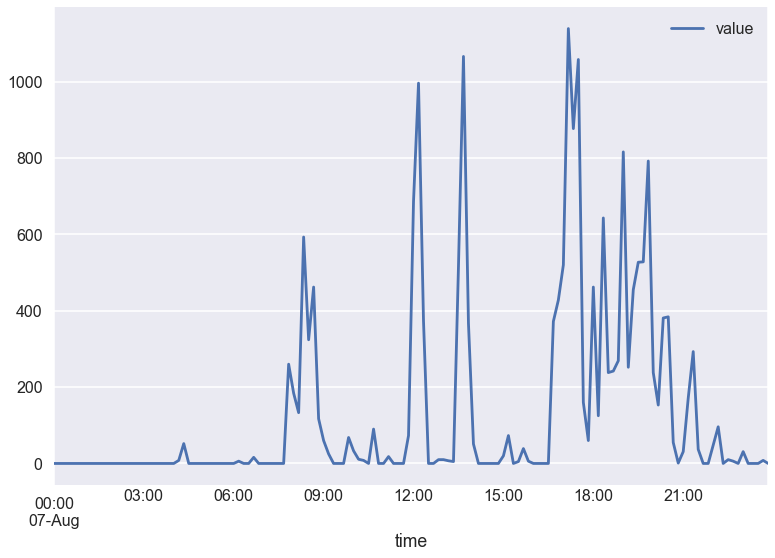

In [68]:
df15min.plot()

In [69]:
intraday = authd_client.intraday_time_series(
    'activities/steps', base_date='2017-08-04', detail_level='1min')

In [70]:
df_day4 = pd.DataFrame(intraday['activities-steps-intraday']['dataset'])

In [71]:
df_day4['time'] = pd.to_datetime(df_day4['time'])
df_day4 = df_day4.set_index('time')

In [72]:
dfday415min = df_day4.resample('10T').sum()

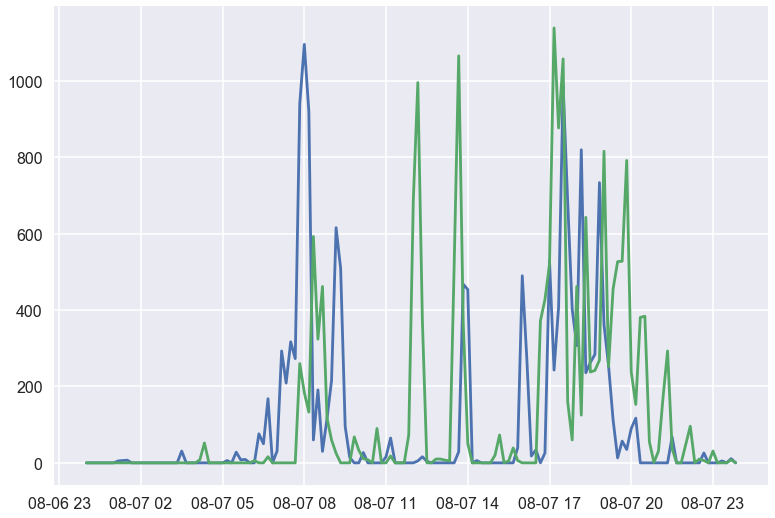

In [75]:
plt.plot(dfday415min)
plt.plot(df15min)